### 5. WAP to train and evaluate a convolutional neural network using Keras Library to classify MNIST fashion dataset. Demonstrate the effect of filter size, regularization, batch size and optimization algorithm on model performance.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
# Reshape data for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
# Function to create a CNN model with varying hyperparameters
def create_model(filter_size=3, reg_factor=0.001, optimizer='adam'):
    model = keras.Sequential([
        layers.Conv2D(32, (filter_size, filter_size), activation='relu', kernel_regularizer=regularizers.l2(reg_factor), input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (filter_size, filter_size), activation='relu', kernel_regularizer=regularizers.l2(reg_factor)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(reg_factor)),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [9]:
# Define hyperparameters
filter_sizes = [7]
regularization_factors = [0.0001]
batch_sizes = [100]
optimizers = ['adam']

Training model with filter_size=7, reg_factor=0.0001, batch_size=100, optimizer=adam


c:\Users\RAM KISHOR VAISHNAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.6951 - loss: 0.8627 - val_accuracy: 0.8306 - val_loss: 0.4978
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.8541 - loss: 0.4336 - val_accuracy: 0.8596 - val_loss: 0.4213
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8747 - loss: 0.3723 - val_accuracy: 0.8713 - val_loss: 0.3843
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.8846 - loss: 0.3459 - val_accuracy: 0.8810 - val_loss: 0.3691
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.8962 - loss: 0.3203 - val_accuracy: 0.8770 - val_loss: 0.3794
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.9009 - loss: 0.3015 - val_accuracy: 0.8925 - val_loss: 0.3333
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9111 - loss: 0.2793 - val_accuracy: 0.8938 - val_loss: 0.3305
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.9122 - loss: 0.2752 - 

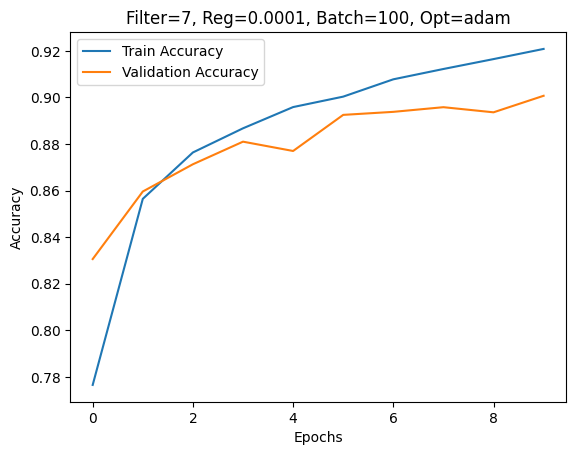

In [10]:
# Train and evaluate models
for filter_size in filter_sizes:
    for reg_factor in regularization_factors:
        for batch_size in batch_sizes:
            for optimizer in optimizers:
                print(f"Training model with filter_size={filter_size}, reg_factor={reg_factor}, batch_size={batch_size}, optimizer={optimizer}")
                model = create_model(filter_size, reg_factor, optimizer)
                history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1)
                
                # Evaluate model
                test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
                print(f"Test accuracy: {test_acc:.4f}\n")
                
                # Plot training history
                plt.plot(history.history['accuracy'], label='Train Accuracy')
                plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
                plt.title(f"Filter={filter_size}, Reg={reg_factor}, Batch={batch_size}, Opt={optimizer}")
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.show()


---
---

Acc - 90.07
runtime - 3m 47s

---
---

In [11]:
# Define hyperparameters
filter_sizes = [7]
regularization_factors = [0.0001]
batch_sizes = [100]
optimizers = ['adam']
epochs = 20

Training model with filter_size=7, reg_factor=0.0001, batch_size=100, optimizer=adam


c:\Users\RAM KISHOR VAISHNAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.7061 - loss: 0.8468 - val_accuracy: 0.8429 - val_loss: 0.4638
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.8577 - loss: 0.4208 - val_accuracy: 0.8588 - val_loss: 0.4224
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.8736 - loss: 0.3710 - val_accuracy: 0.8747 - val_loss: 0.3768
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.8914 - loss: 0.3296 - val_accuracy: 0.8802 - val_loss: 0.3715
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.8990 - loss: 0.3069 - val_accuracy: 0.8813 - val_loss: 0.3652
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.9061 - loss: 0.2922 - val_accuracy: 0.8868 - val_loss: 0.3563
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9122 - loss: 0.2782 - val_accuracy: 0.8928 - val_loss: 0.3405
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9166 - loss: 0.2625 - 

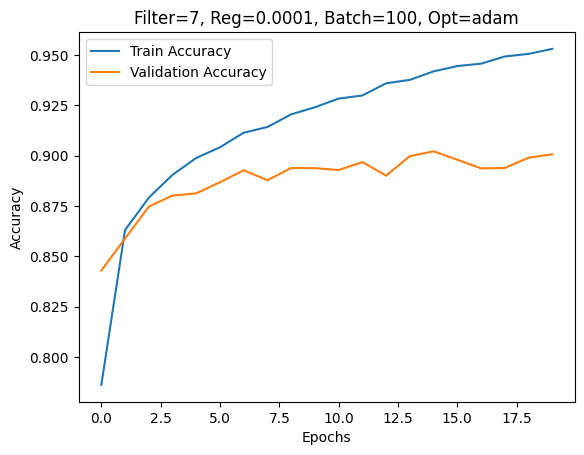

In [12]:
# Train and evaluate models
for filter_size in filter_sizes:
    for reg_factor in regularization_factors:
        for batch_size in batch_sizes:
            for optimizer in optimizers:
                print(f"Training model with filter_size={filter_size}, reg_factor={reg_factor}, batch_size={batch_size}, optimizer={optimizer}")
                model = create_model(filter_size, reg_factor, optimizer)
                history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1)
                
                # Evaluate model
                test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
                print(f"Test accuracy: {test_acc:.4f}\n")
                
                # Plot training history
                plt.plot(history.history['accuracy'], label='Train Accuracy')
                plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
                plt.title(f"Filter={filter_size}, Reg={reg_factor}, Batch={batch_size}, Opt={optimizer}")
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.show()


---
---

Acc - 90.07
runtime - 5m 20s

---
---

In [13]:
# Define hyperparameters
filter_sizes = [7]
regularization_factors = [0.001]
batch_sizes = [100]
optimizers = ['tf.keras.optimizers.Adadelta(learning_rate=1.0)']
epochs = 20
lr = 0.01

Training model with filter_size=7, reg_factor=0.001, batch_size=100, optimizer=tf.keras.optimizers.Adadelta(learning_rate=1.0)


c:\Users\RAM KISHOR VAISHNAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.3555 - loss: 2.3257 - val_accuracy: 0.6697 - val_loss: 1.3139
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6833 - loss: 1.2009 - val_accuracy: 0.7063 - val_loss: 1.0584
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.7171 - loss: 1.0199 - val_accuracy: 0.7183 - val_loss: 0.9943
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.7312 - loss: 0.9611 - val_accuracy: 0.7323 - val_loss: 0.9528
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.7412 - loss: 0.9210 - val_accuracy: 0.7360 - val_loss: 0.9254
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.7455 - loss: 0.9027 - val_accuracy: 0.7396 - val_loss: 0.9060
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.7545 - loss: 0.8785 - val_accuracy: 0.7504 - val_loss: 0.8867
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.7571 - loss: 0.8645 - 

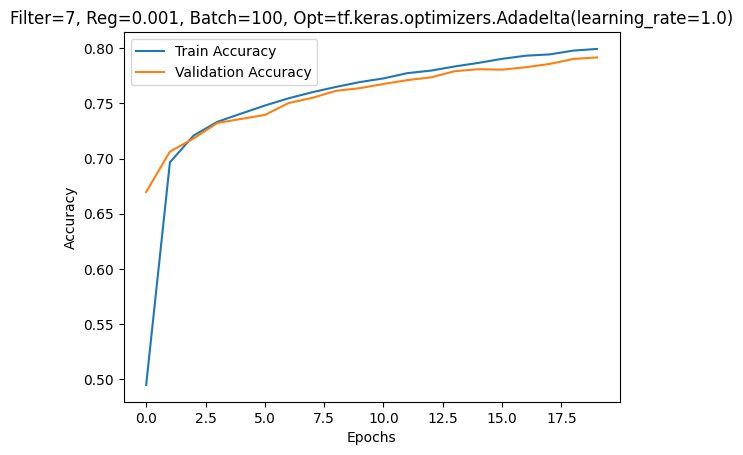

In [14]:
# Train and evaluate models
for filter_size in filter_sizes:
    for reg_factor in regularization_factors:
        for batch_size in batch_sizes:
            for optimizer in optimizers:
                print(f"Training model with filter_size={filter_size}, reg_factor={reg_factor}, batch_size={batch_size}, optimizer={optimizer}")
                model = create_model(filter_size, reg_factor, optimizer=tf.keras.optimizers.Adadelta(learning_rate=lr))
                history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1)
                
                # Evaluate model
                test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
                print(f"Test accuracy: {test_acc:.4f}\n")
                
                # Plot training history
                plt.plot(history.history['accuracy'], label='Train Accuracy')
                plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
                plt.title(f"Filter={filter_size}, Reg={reg_factor}, Batch={batch_size}, Opt={optimizer}")
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.show()


---
---

Acc - 79
runtime - 5m 20s

---
---

In [21]:
# Function to create a CNN model with varying hyperparameters
def create_model(filter_size=3, reg_factor=0.001, optimizer='adam'):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(reg_factor), input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (5, 5), activation='relu', kernel_regularizer=regularizers.l2(reg_factor)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(reg_factor)),
        layers.Dropout(rate=0.5),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(reg_factor)),
        layers.Dropout(rate=0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [22]:
# Define hyperparameters
filter_sizes = [3]
regularization_factors = [0.001]
batch_sizes = [128]
optimizers = ['tf.keras.optimizers.Adadelta(learning_rate=1.0)']
epochs = 12
lr = 0.01

Training model with filter_size=3, reg_factor=0.001, batch_size=128, optimizer=tf.keras.optimizers.Adadelta(learning_rate=1.0)
Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.1466 - loss: 2.6402 - val_accuracy: 0.3890 - val_loss: 2.5076
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.2758 - loss: 2.4839 - val_accuracy: 0.4698 - val_loss: 2.1622
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.3474 - loss: 2.2125 - val_accuracy: 0.5107 - val_loss: 1.8168
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.3971 - loss: 1.9924 - val_accuracy: 0.5800 - val_loss: 1.6216
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.4451 - loss: 1.8528 - val_accuracy: 0.6150 - val_loss: 1.4926
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.4752 - loss: 1.7629 - val_accuracy: 0.6631 - val_loss: 1.3940
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.5085 - loss: 1.6753 - val

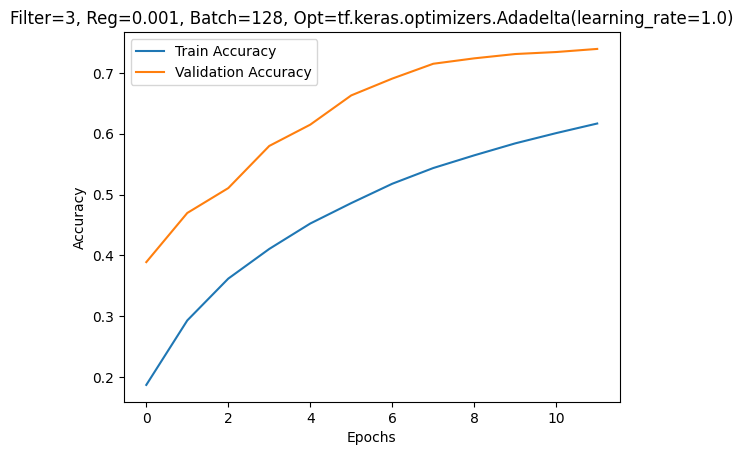

In [23]:
# Train and evaluate models
for filter_size in filter_sizes:
    for reg_factor in regularization_factors:
        for batch_size in batch_sizes:
            for optimizer in optimizers:
                print(f"Training model with filter_size={filter_size}, reg_factor={reg_factor}, batch_size={batch_size}, optimizer={optimizer}")
                model = create_model(filter_size, reg_factor, optimizer=tf.keras.optimizers.Adadelta(learning_rate=lr))
                history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1)
                
                # Evaluate model
                test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
                print(f"Test accuracy: {test_acc:.4f}\n")
                
                # Plot training history
                plt.plot(history.history['accuracy'], label='Train Accuracy')
                plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
                plt.title(f"Filter={filter_size}, Reg={reg_factor}, Batch={batch_size}, Opt={optimizer}")
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.show()


---
---

acc = 
time = 

---
---

Training model with filter_size=3, reg=0.001, batch_size=32, optimizer=adam


c:\Users\RAM KISHOR VAISHNAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with filter_size=3, reg=0.001, batch_size=32, optimizer=sgd
Training model with filter_size=3, reg=0.001, batch_size=64, optimizer=adam
Training model with filter_size=3, reg=0.001, batch_size=64, optimizer=sgd
Training model with filter_size=3, reg=0.01, batch_size=32, optimizer=adam
Training model with filter_size=3, reg=0.01, batch_size=32, optimizer=sgd
Training model with filter_size=3, reg=0.01, batch_size=64, optimizer=adam
Training model with filter_size=3, reg=0.01, batch_size=64, optimizer=sgd
Training model with filter_size=5, reg=0.001, batch_size=32, optimizer=adam
Training model with filter_size=5, reg=0.001, batch_size=32, optimizer=sgd
Training model with filter_size=5, reg=0.001, batch_size=64, optimizer=adam
Training model with filter_size=5, reg=0.001, batch_size=64, optimizer=sgd
Training model with filter_size=5, reg=0.01, batch_size=32, optimizer=adam
Training model with filter_size=5, reg=0.01, batch_size=32, optimizer=sgd
Training model with filte

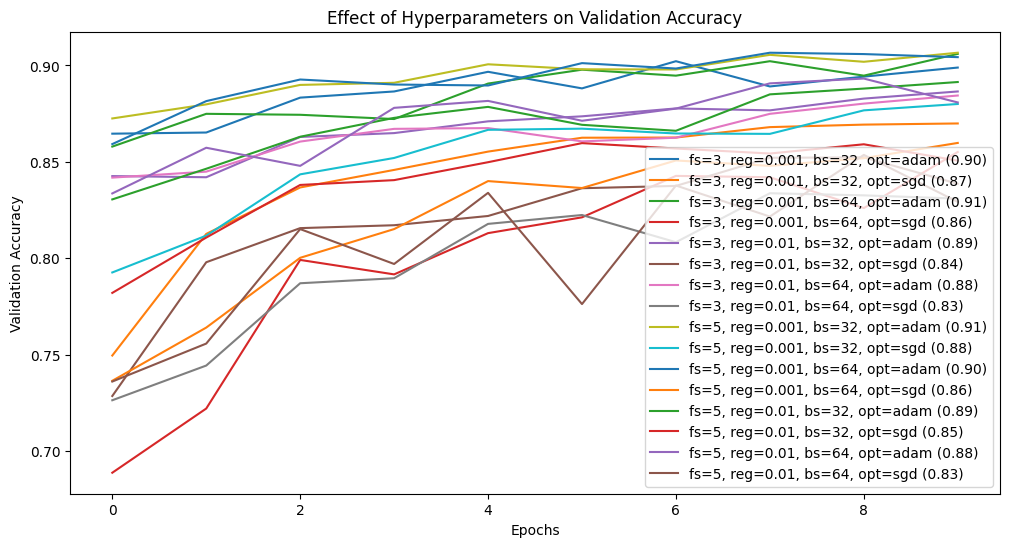

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

def create_model(filter_size=3, regularization=0.001, optimizer='adam'):
    model = keras.Sequential([
        layers.Conv2D(32, (filter_size, filter_size), activation='relu', kernel_regularizer=regularizers.l2(regularization), input_shape=(28, 28, 1)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (filter_size, filter_size), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(regularization)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

filter_sizes = [3, 5]
regularization_values = [0.001, 0.01]
batch_sizes = [32, 64]
optimizers = ['adam', 'sgd']

results = {}
for filter_size in filter_sizes:
    for reg in regularization_values:
        for batch_size in batch_sizes:
            for optimizer in optimizers:
                print(f"Training model with filter_size={filter_size}, reg={reg}, batch_size={batch_size}, optimizer={optimizer}")
                model = create_model(filter_size, reg, optimizer)
                history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
                test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
                results[(filter_size, reg, batch_size, optimizer)] = (history, test_acc)

plt.figure(figsize=(12, 6))
for key, (history, acc) in results.items():
    filter_size, reg, batch_size, optimizer = key
    plt.plot(history.history['val_accuracy'], label=f'fs={filter_size}, reg={reg}, bs={batch_size}, opt={optimizer} ({acc:.2f})')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Effect of Hyperparameters on Validation Accuracy')
plt.show()


c:\Users\RAM KISHOR VAISHNAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
938/938 - 78s - 84ms/step - accuracy: 0.6827 - loss: 1.2764 - val_accuracy: 0.8260 - val_loss: 0.8172 - learning_rate: 5.0000e-04
Epoch 2/30
938/938 - 70s - 74ms/step - accuracy: 0.7833 - loss: 0.8579 - val_accuracy: 0.8574 - val_loss: 0.6252 - learning_rate: 5.0000e-04
Epoch 3/30
938/938 - 70s - 74ms/step - accuracy: 0.8158 - loss: 0.6855 - val_accuracy: 0.8367 - val_loss: 0.5785 - learning_rate: 5.0000e-04
Epoch 4/30
938/938 - 72s - 76ms/step - accuracy: 0.8322 - loss: 0.5847 - val_accuracy: 0.8601 - val_loss: 0.5066 - learning_rate: 5.0000e-04
Epoch 5/30
938/938 - 72s - 76ms/step - accuracy: 0.8431 - loss: 0.5259 - val_accuracy: 0.8662 - val_loss: 0.4539 - learning_rate: 5.0000e-04
Epoch 6/30
938/938 - 70s - 75ms/step - accuracy: 0.8552 - loss: 0.4847 - val_accuracy: 0.8725 - val_loss: 0.4119 - learning_rate: 5.0000e-04
Epoch 7/30
938/938 - 69s - 74ms/step - accuracy: 0.8620 - loss: 0.4587 - val_accuracy: 0.8945 - val_loss: 0.3765 - learning_rate: 5.0000e-04
Epoch 8/30
93

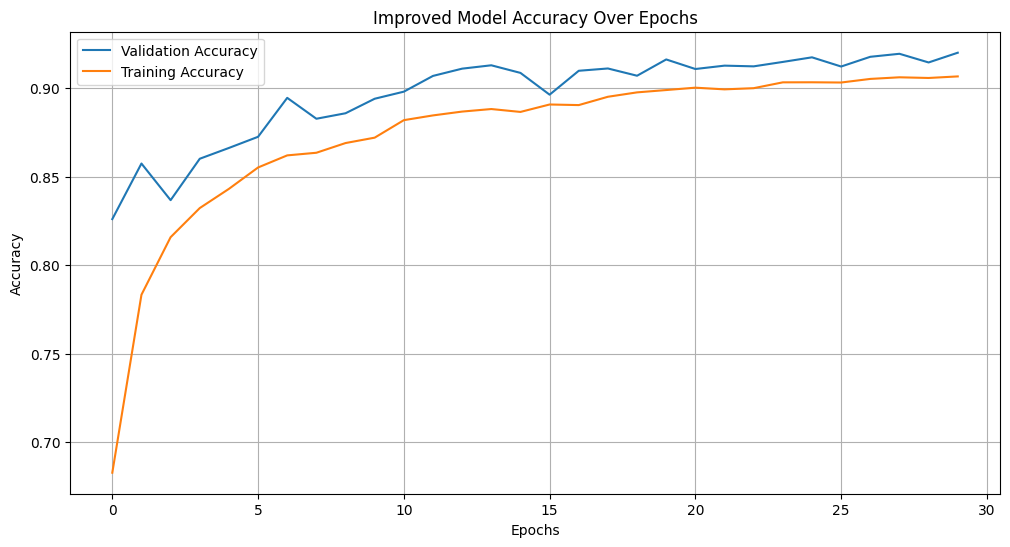

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Data Augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Improved model creation
def create_improved_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_improved_model()

# Learning rate scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler],
                    verbose=2)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Improved Model Accuracy Over Epochs')
plt.grid(True)
plt.show()


Epoch 1/50
469/469 - 207s - 442ms/step - accuracy: 0.5966 - loss: 1.6458 - val_accuracy: 0.5688 - val_loss: 1.5608 - learning_rate: 4.0000e-04
Epoch 2/50
469/469 - 191s - 406ms/step - accuracy: 0.7377 - loss: 1.1174 - val_accuracy: 0.8044 - val_loss: 0.9057 - learning_rate: 4.0000e-04
Epoch 3/50
469/469 - 191s - 408ms/step - accuracy: 0.7857 - loss: 0.9257 - val_accuracy: 0.8385 - val_loss: 0.7340 - learning_rate: 4.0000e-04
Epoch 4/50
469/469 - 192s - 410ms/step - accuracy: 0.8098 - loss: 0.7921 - val_accuracy: 0.8468 - val_loss: 0.6544 - learning_rate: 4.0000e-04
Epoch 5/50
469/469 - 188s - 400ms/step - accuracy: 0.8293 - loss: 0.6884 - val_accuracy: 0.8572 - val_loss: 0.5717 - learning_rate: 4.0000e-04
Epoch 6/50
469/469 - 191s - 407ms/step - accuracy: 0.8422 - loss: 0.6098 - val_accuracy: 0.8787 - val_loss: 0.5065 - learning_rate: 4.0000e-04
Epoch 7/50
469/469 - 192s - 408ms/step - accuracy: 0.8507 - loss: 0.5641 - val_accuracy: 0.8718 - val_loss: 0.4889 - learning_rate: 4.0000e-04

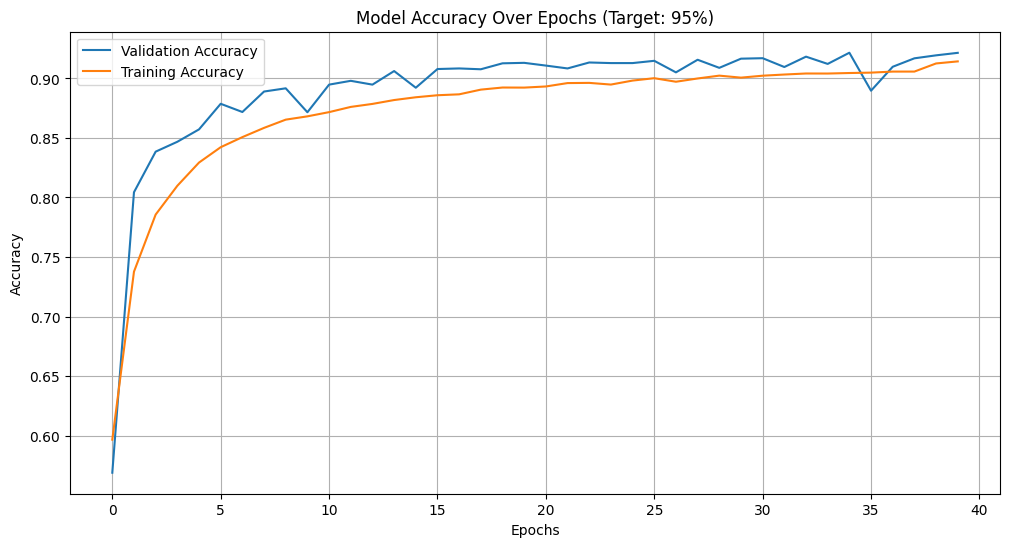

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Data Augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Improved model architecture
def create_improved_model():
    model = keras.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=0.0004)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_improved_model()

# Callbacks
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Train model
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler, early_stop],
                    verbose=2)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Final Test Accuracy: {test_acc * 100:.2f}%")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs (Target: 95%)')
plt.grid(True)
plt.show()
